This project leverages the Hugging Face Diffusers library to implement a pipeline for generating images using the Stable Diffusion model. The model is pre-trained on a large dataset and utilizes latent diffusion to create high-quality visuals from textual prompts. The StableDiffusionPipeline from the Diffusers library is employed to process text prompts and synthesize corresponding images.

In [1]:
!pip install diffusers torch torchvision transformers accelerate


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating an image for the prompt: 'A magical forest with glowing trees and a waterfall, fantasy art'


  0%|          | 0/50 [00:00<?, ?it/s]

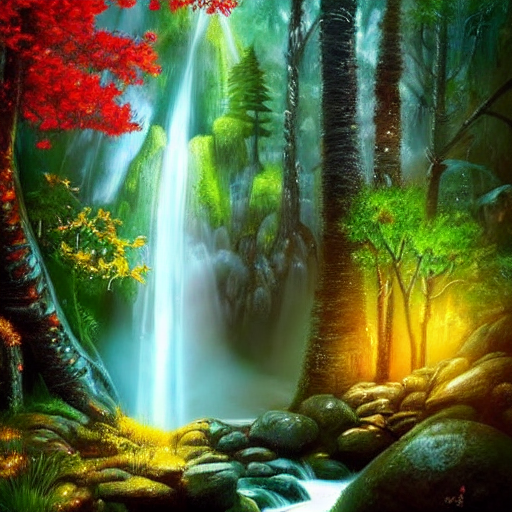

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display

# Check if GPU is available, else fallback to CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pre-trained Stable Diffusion model
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline = pipeline.to(device)

def generate_and_display_image(prompt, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate an image using Stable Diffusion and display it.

    Args:
        prompt (str): The text prompt for image generation.
        num_inference_steps (int): Number of diffusion steps (quality vs. speed tradeoff).
        guidance_scale (float): Strength of adherence to the prompt.

    Returns:
        None: Displays the generated image in the notebook.
    """
    print(f"Generating an image for the prompt: '{prompt}'")

    # Generate the image
    with torch.no_grad():
        image = pipeline(prompt,
                         num_inference_steps=num_inference_steps,
                         guidance_scale=guidance_scale).images[0]

    # Display the generated image
    display(image)

if __name__ == "__main__":
    # Define your prompt
    prompt_text = "A magical forest with glowing trees and a waterfall, fantasy art"

    # Generate and display the image
    generate_and_display_image(prompt=prompt_text)


This project integrates the Stable Diffusion model with Hugging Face's model hub to implement a text-to-image generation pipeline. The pre-trained model is retrieved using the from_pretrained method, ensuring access to state-of-the-art weights optimized for latent diffusion. This implementation employs Hugging Face's robust model hosting infrastructure, allowing seamless access and deployment of the Stable Diffusion model.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating an image for the prompt: 'A serene mountain lake at sunrise, photo-realistic'


  0%|          | 0/50 [00:00<?, ?it/s]

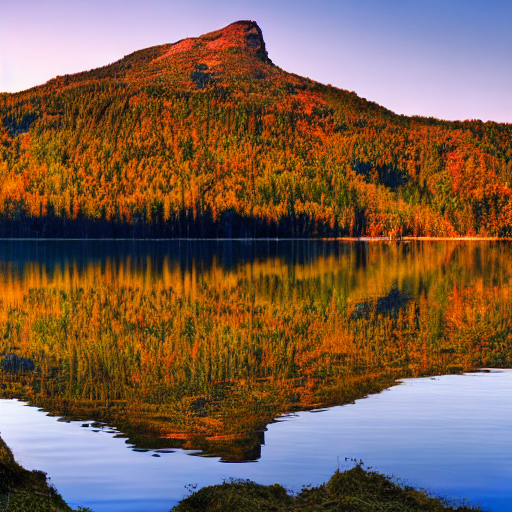

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display

# Set up device for computation
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the Stable Diffusion model from Hugging Face
model_id = "runwayml/stable-diffusion-v1-5"
pipeline = StableDiffusionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

def generate_and_display_image_hf(prompt, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate and display an image using Stable Diffusion via Hugging Face.

    Args:
        prompt (str): The text prompt for image generation.
        num_inference_steps (int): Number of diffusion steps (quality vs. speed tradeoff).
        guidance_scale (float): Strength of adherence to the prompt.

    Returns:
        None: Displays the generated image in the notebook.
    """
    print(f"Generating an image for the prompt: '{prompt}'")

    # Generate the image
    with torch.no_grad():
        image = pipeline(prompt,
                         num_inference_steps=num_inference_steps,
                         guidance_scale=guidance_scale).images[0]

    # Display the generated image
    display(image)

if __name__ == "__main__":
    # Example prompt
    prompt_text = "A serene mountain lake at sunrise, photo-realistic"

    # Generate and display the image
    generate_and_display_image_hf(prompt=prompt_text)
